In [23]:


import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import string
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\amanp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
colnames=Reviewdata.columns = ['tweet_ID', 'Entity', 'Sentiment', 'Tweet_content']


In [20]:
Reviewdata = pd.read_csv("twitter_training.csv",names=colnames,)
Reviewdata.head()

,tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [21]:
Reviewdata.shape

(74682, 4)

In [22]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
Reviewdata.isnull().sum()

tweet_ID           0
Entity             0
Sentiment          0
Tweet_content    686
dtype: int64

In [12]:
Reviewdata.dropna(inplace=True)

In [13]:
Reviewdata.isnull().sum()

tweet_ID         0
Entity           0
Sentiment        0
Tweet_content    0
dtype: int64

In [14]:
#EDA
### checking missing value in the dataset and printing the percentage
### for missing values for Each Columns ###
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1,
                         keys=['Count','Percentage'])
print('Count and percentage of missing values for the columns:')
              
missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
tweet_ID,0,0.0
Entity,0,0.0
Sentiment,0,0.0
Tweet_content,0,0.0


In [15]:
#Reviewdata = Reviewdata.rename(columns={'Positive': 'Is_Response'})

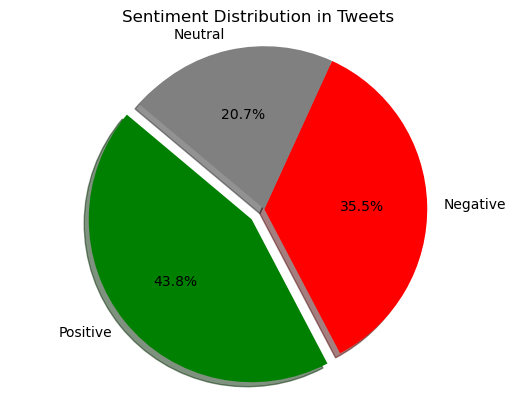

In [26]:
positive_count = len(positive_tweets)
negative_count = len(negative_tweets)
neutral_count = len(neutral_tweets)
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['green', 'red', 'gray']
explode = (0.1, 0, 0)  # Explode the 1st slice (Positive)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Sentiment Distribution in Tweets')
plt.show()

Percentage for default

Sentiment
Negative      30.22
Positive      27.91
Neutral       24.47
Irrelevant    17.40
Name: proportion, dtype: float64


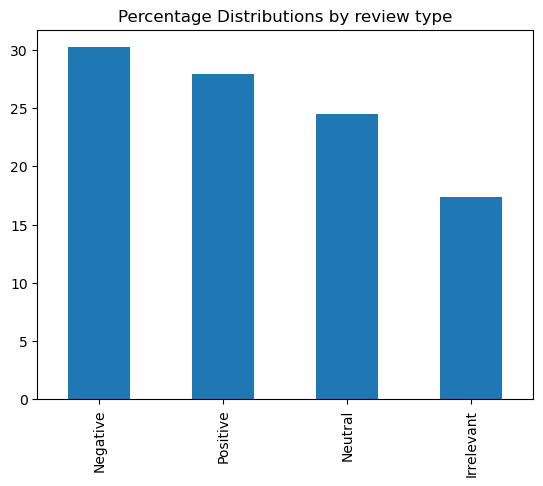

In [16]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.Sentiment.value_counts(normalize=True)*100,2))
round(Reviewdata.Sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.xlabel('')
plt.show()


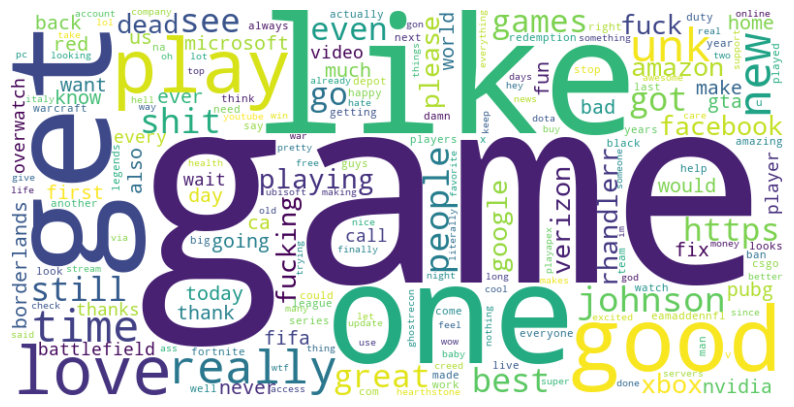

In [17]:
# Combine all tweets into a single string
all_tweets = ' '.join(Reviewdata['Tweet_content'].dropna())

# Tokenization and preprocessing
stop_words = set(stopwords.words('english'))
tokens = word_tokenize(all_tweets.lower())
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Generate frequency distribution
freq_dist = FreqDist(tokens)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the Word Cloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Turn off the axis
plt.show()

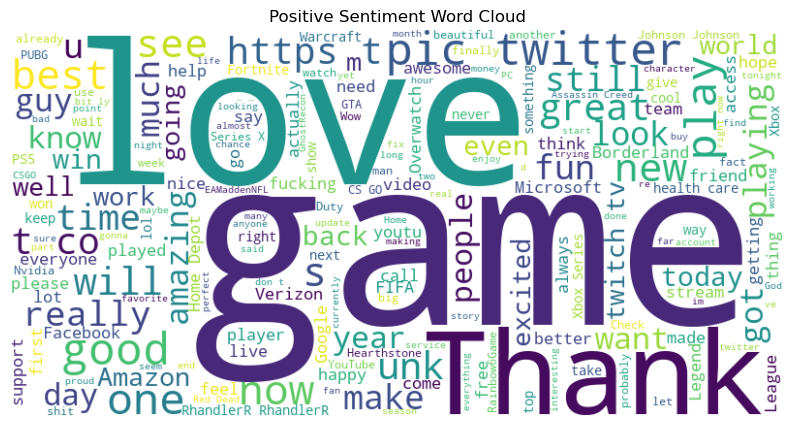

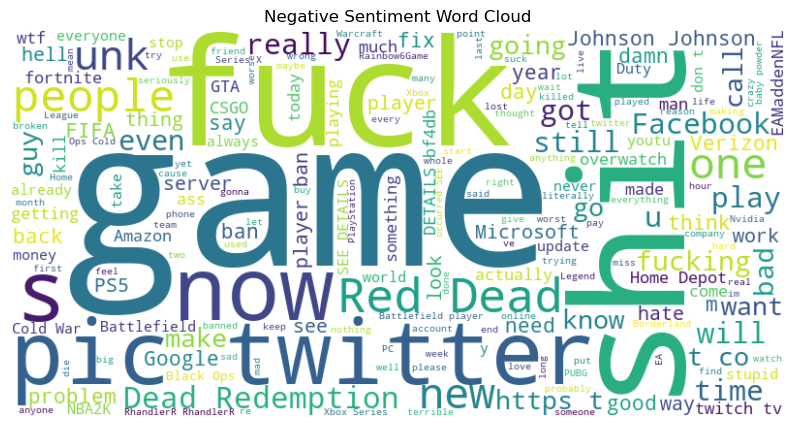

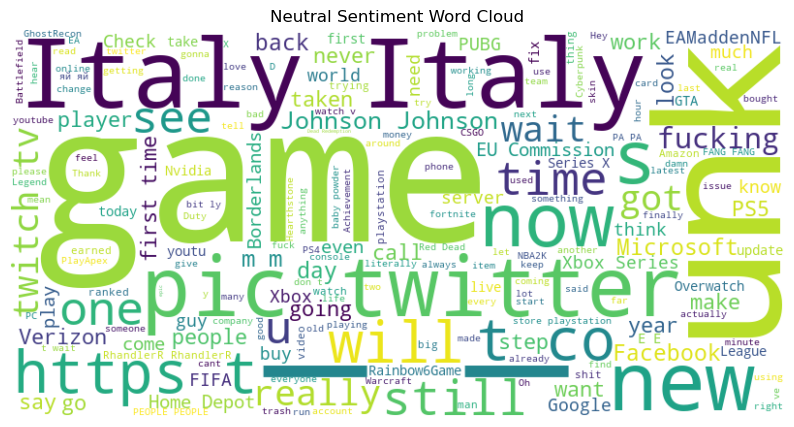

In [25]:
tweets = Reviewdata['Tweet_content'].dropna()

# Initialize SentimentIntensityAnalyzer from nltk
sia = SentimentIntensityAnalyzer()

# Categorize tweets into positive, negative, and neutral
positive_tweets = [tweet for tweet in tweets if sia.polarity_scores(tweet)['compound'] > 0.1]
negative_tweets = [tweet for tweet in tweets if sia.polarity_scores(tweet)['compound'] < -0.1]
neutral_tweets = [tweet for tweet in tweets if -0.1 <= sia.polarity_scores(tweet)['compound'] <= 0.1]

# Function to generate and plot word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')  # Turn off the axis
    plt.title(title)
    plt.show()

# Generate and plot word clouds for each sentiment
generate_wordcloud(positive_tweets, 'Positive Sentiment Word Cloud')
generate_wordcloud(negative_tweets, 'Negative Sentiment Word Cloud')
generate_wordcloud(neutral_tweets, 'Neutral Sentiment Word Cloud')

In [29]:
Reviewdata.drop(columns=['tweet_ID','Entity'],inplace=True)

In [30]:
Reviewdata.head()

,Sentiment,Tweet_content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [31]:
#Apply first level cleanning
import re
import string

#This function converts to lower-case,removes sqaure bracket,removes number and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [32]:
#lets take a look  at the updated text
Reviewdata['cleaned_description'] = pd.DataFrame(Reviewdata['Tweet_content'].apply(cleaned1))
Reviewdata.head(10)

,Sentiment,Tweet_content,cleaned_description
0,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...
5,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
6,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
7,Positive,So I spent a couple of hours doing something f...,so i spent a couple of hours doing something f...
8,Positive,So I spent a few hours doing something for fun...,so i spent a few hours doing something for fun...
9,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...


In [33]:
#Apply a second round of cleaning 
def text_clean_2(text):
    text = re.sub('[''""...]','',text)
    text = re.sub('\n','',text)
    return text
cleaned2 = lambda x: text_clean_2(x)

In [34]:
#Lets take a look at the updated text
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head()

,Sentiment,Tweet_content,cleaned_description,cleaned_description_new
0,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,im getting on borderlands and i will murder y...


In [36]:
#Model Training
from sklearn.model_selection import train_test_split
Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Sentiment

IV_train,IV_test,DV_train,DV_test = train_test_split(Independent_var,Dependent_var,test_size = 0.1,random_state=225)

print('IV_train :',len(IV_train))
print('IV_test :',len(IV_train))
print('DV_train :',len(DV_train))
print('DV_test :',len(DV_train))

IV_train : 66596
IV_test : 66596
DV_train : 66596
DV_test : 66596


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver='lbfgs')

In [38]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train,DV_train)

from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions,DV_test)

C:\Users\amanp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 858,   81,   86,   98],
       [ 144, 1824,  240,  210],
       [  94,  144, 1266,  152],
       [ 156,  130,  211, 1706]], dtype=int64)

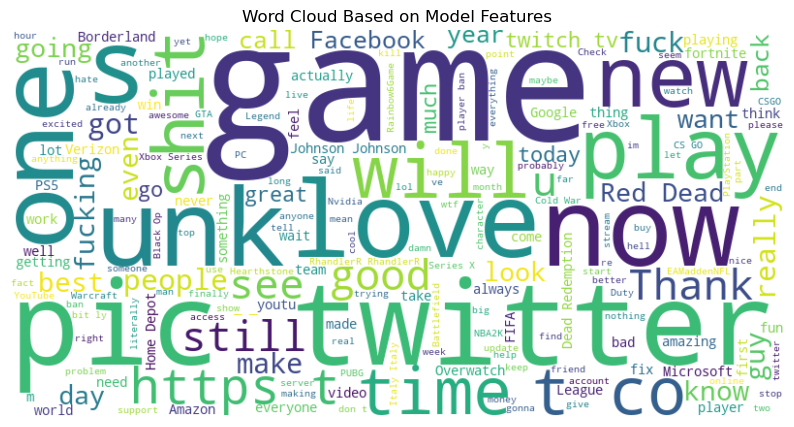

In [33]:
text_data = " ".join(Reviewdata['Tweet_content'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the Word Cloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud Based on Model Features')
plt.show()

In [39]:
#accuracy is the overall accuracy of the model 
#recall 
#precision is ac

from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy :",accuracy_score(predictions,DV_test))
print("Precision :",precision_score(predictions,DV_test,average = 'weighted'))
print("Recall :",recall_score(predictions,DV_test,average = 'weighted'))

Accuracy : 0.764054054054054
Precision : 0.7691327686683874
Recall : 0.764054054054054


In [63]:
# trying on new content
example = ['Nvidia doesn’t intend to give its opinion ']
result = model.predict(example)
print(result)

['Neutral']


In [68]:
example = ["This is all based on last quarter's earnings."]
result = model.predict(example)
print(result)

['Irrelevant']


In [71]:
example = ["one of the biggest dissapointment is about how nvidia is delaying their plans "]
result = model.predict(example)
print(result)

['Negative']


In [94]:
example = [" you are a  Simp"]
result = model.predict(example)
print(result)

['Irrelevant']


In [77]:
example = ["borderland game is amazing"]
result = model.predict(example)
print(result)

['Positive']


In [86]:
example = ['Wonderful summer photos ' ]
result = model.predict(example)
print(result)

['Neutral']


In [97]:
example = ['this game is so boring ' ]
result = model.predict(example)
print(result)

['Negative']
